# *The Scalper Project*
### Table of Contents
#### 1 - Overview
#### 2 - Approach
#### 3 - Scraping and CSV's
#### 4 - Data Visualization
#### 5 - Linear Regression
#### 6 - Conclusions



In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

## Overview
<br>
The global pandemic is severely limiting the supply chain, and this has caused a massive rise to scalpers. Scalpers are people who buy a product with no intention of using it, only to turn around and sell the product online for double, triple, or quadruple its msrp. There has been an uptick in scalping due to the mass unemployment spike from covid-19. Scalpers have been known to take advantage of any product where the supply does not meet the but for our project we will be focused on the Sony Playstation 5. We will be using a web scraper to find the inflated prices of scalped products and graph them against the msrp. We will find historical data of similar scalped products and graph them as well. Then, we can compare the pre-covid scalping to todays scapling, amisdst a disrupted supply chain, and observe any differences.We will look at past scalped products price trends and make predictions about trojectory of the Playstation 5 price.

## Approach
<br>
For this project we wanted to make a notebook that flexed our new python toolkit. It had to include a scraper for gathering data, Seaborn and Matplotlib graphs for visuals, and a regression line to predict the future of our data. We went through multiple ideas, from social media analysis, to google search trends but ultimately settled on the rising trend of scalping. Scalping is when a person buys a product that is in high demand, only to turn around and sell it for a marked up price. This technique is time sensitive, and only works when the supply has not met the demand. With the global pandemic slowing the supply chain, we wanted to show just how unbelievable scalping has become.
First off, we needed data. ALOT of data. We set our eyes upon eBay, a platform that opens its arms to scalpers around the world. We settled on researching the PS5,which has become notorious as an expensive item with an unbelivable demand that has horrible supply chain issues. A quick search showed that the PS5 was being scalped for more than double its MSRP (Manufacturer Suggested Retail Price). With that, we had a target. We needed the current listings, and the sales history since its release. This information was public but very hard to access, and storing it all in a database by hand would take weeks. We needed a scraper.

## Scraping & CSV's
<br>
We wrote a web scraper to pull current eBay prices of scalped products. The scraper also collected eBay sold auctions for the past 9000 completed listings. Initially we were unable to get the more than the first 60 results from ebay as their protections would kick us out. Using a random function and a list of user agents, we were able to defeat the safegaurd and scrape 900 current listings and 9000 completed listings. We scraped eBay for the Playstation 5, Xbox Series X and the Nvidia RTX 3080. It was really interesting to watch objects fall off the csv each time we would run the scraper. It really illustrated how volatile internet data can be. With some simple regex formatting we were able to write the data to csv in a usable format for our data visualizations.

## Data Visualization
<br>
Now that we have concrete data, we can make graphs to help draw conclusions.



### Lee

## What are the historical sales of the PS5?

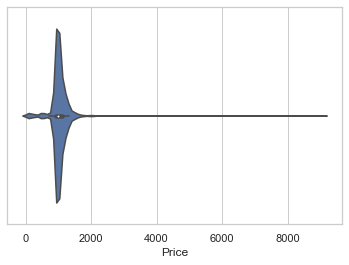

In [2]:
# December 8 - November 30 Sales Data Violin Plot
# The outliers in our data destroy this graph
sns.set_theme(style='whitegrid')
df_tues_sold = pd.read_csv('data/sold_scrape_tuesday.csv')
orchestra = sns.violinplot(x=df_tues_sold['Price'], inner='box', )

## Maybe Without Outliers?

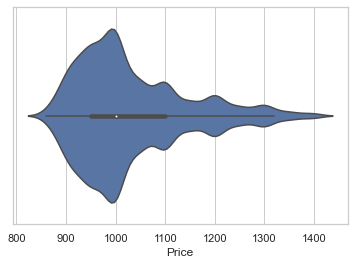

In [3]:
# December 8 - November 30 PS5 Sales Data Violin Plot (Outliers Cut)
# Mean = $1030
sorting_asc = df_tues_sold.sort_values(by='Price', ascending=True).tail(9000)
sorting_asc_filtered_top = sorting_asc[df_tues_sold['Price'] < 1400]
orchestra = sns.violinplot(x=sorting_asc_filtered_top['Price'], inner='box')

## New PS5 Listings

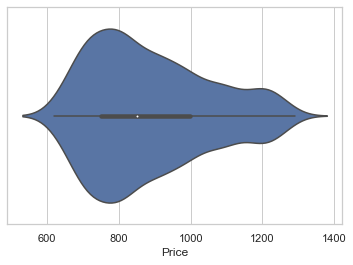

In [4]:
# December 8 PS5 New Listings Snapshot Violin Plot (Outliers Cut)
items = pd.read_csv('data/new_ebay_tues.csv')
price = items['Price']
price = price[price.between(price.quantile(.05), price.quantile(.90))]
orchestra = sns.violinplot(x=price)

## PS5 Joint Plot Showing Heatmap of Historical Sales

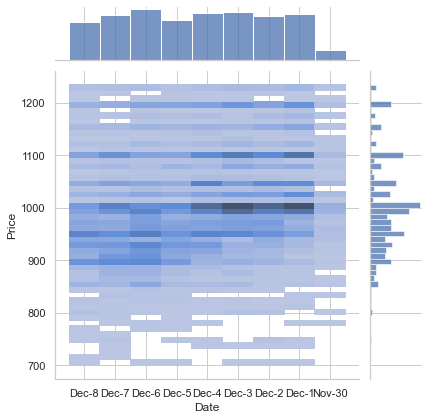

In [5]:
# December 8 - November 30 PS5 Sales Data Joint Plot (Outliers Cut)
price =  df_tues_sold['Price']
price = price[price.between(price.quantile(.05), price.quantile(.90))]
dates = df_tues_sold['Date']
joint = sns.jointplot(x=dates, y=price, kind='hist')

## Nvidia 3080 Historical Sales Prices

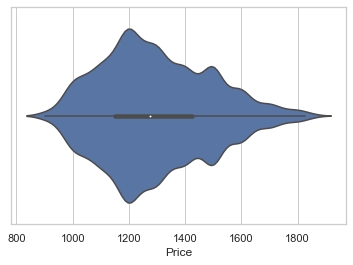

In [6]:
# September 10 - December 9 Nvidia 3080 Sales Data Violin Plot (Outliers Cut)
# Mean = $1294
g_cards = pd.read_csv('data/3080_sold.csv')
g_card_price = g_cards['Price']
legit_data = g_card_price = g_card_price[g_card_price.between(g_card_price.quantile(.05), g_card_price.quantile(.95))]
orchestra = sns.violinplot(x=legit_data)

## Nvidia 3080 Listings on Decemeber 9th

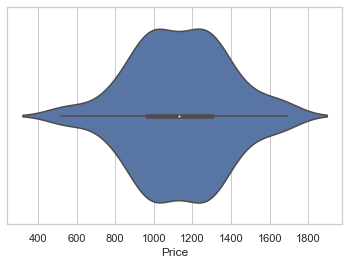

In [7]:
# December 9 Nvidia 3080 New Listing Violin Plot (Outliers Cut)
new_list = pd.read_csv('data/3080_new.csv')
pricings = new_list['Price']
legit_price = pricings[pricings.between(pricings.quantile(.05), pricings.quantile(.95))]
orchestra = sns.violinplot(x=legit_price)

## Xbox Series X Historical Sales

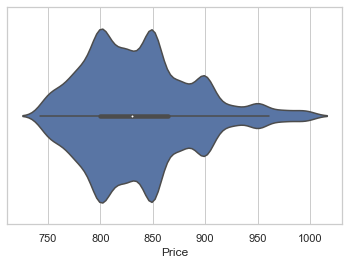

In [8]:
# November 28 - December 9 Xbox Series X Sales Data Violin Plot (Outliers Cut)
xbox = pd.read_csv('data/xbox_sold.csv')
xbox_price = xbox['Price']
xbox_no_out = xbox_price = xbox_price[xbox_price.between(xbox_price.quantile(.05), xbox_price.quantile(.95))]
orchestra = sns.violinplot(x=xbox_no_out)

## Xbox Series X December 9th Listing Snapshot

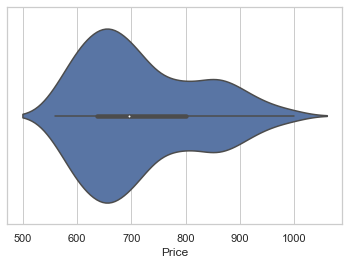

In [9]:
# December 9 Xbox Series X New Listings Violin Plot (Outliers Cut)
xbox = pd.read_csv('data/xbox_new.csv')
xbox_price = xbox['Price']
xbox_price = xbox_price[xbox_price.between(xbox_price.quantile(.05), xbox_price.quantile(.95))]
orchestra = sns.violinplot(x=xbox_price)

### Alex

## Historical Example of Scalping for the PS4

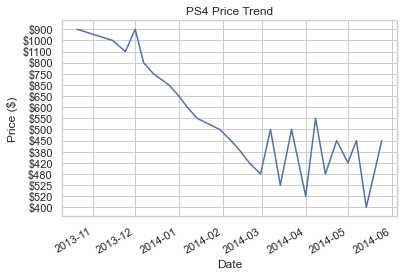

In [10]:
#PS4 price trend on secondary market after release date
PS4_data = pd.read_csv("./assets/data/PS4_3rd_party_sales.csv", parse_dates=["Date"])

dates = pd.Index([pd.Timestamp("Oct 21, 2013"),  
                  pd.Timestamp("May 25, 2014")])
s = pd.Series([1, 2], dates)

x = PS4_data["Date"]
y = PS4_data["Price"]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('PS4 Price Trend')
ax.grid(True)
fig.autofmt_xdate()
plt.gca().invert_yaxis()

plt.show()

## A Glimpse at Sony's stock after the PS4 Release

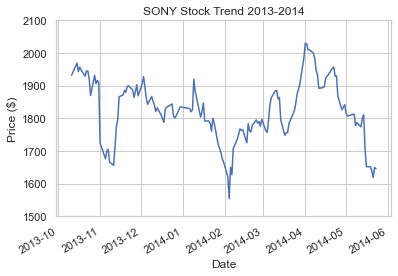

In [11]:
#Show the trend of Sony stock after release
stock_data = pd.read_csv("./assets/data/Sony-stock-data-2013-2014.csv", parse_dates=['Date'])
stock_data["Price"] = stock_data["Price"].apply(lambda x: float(re.sub(",", "", x)))
stock_data["High"] = stock_data["High"].apply(lambda x: float(re.sub(",", "", x)))
x = stock_data["Date"].values
y = stock_data["High"].values

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylim([1500,2100])
ax.set_yticks([1500,1600,1700,1800,1900,2000,2100])
ax.set_xlabel("Date")
ax.set_ylabel('Price ($)')
ax.set_title('SONY Stock Trend 2013-2014')
fig.autofmt_xdate()
plt.show()

### Paul

In [12]:
# Import Datasets
df_ebay = pd.read_csv("./data/ps4_scalped.csv")
df_msrp = pd.read_csv("./data/ps4_msrp.csv")
df_real_ebay = pd.read_csv("./fake-data/ebay_data.csv")
# Combine Dataframes
df_combo = df_msrp
df_combo["ebay"] = df_ebay["price"]
df_combo["price_delta"] = df_combo.ebay - df_combo.price
df_combo["percent_markup"] = (df_combo.ebay / df_combo.price * 100 - 100).round(2)
df_combo["days_since_release"] = df_combo.index.values * 7

# Time History Plot of PS4 Prices

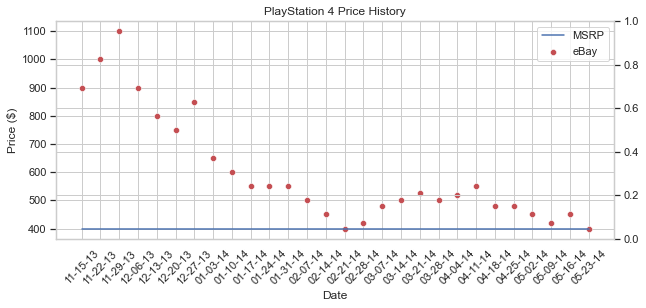

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.scatterplot(x = df_ebay["date"].values,
    y = df_ebay["price"].values,
    color = 'r',
    ax = ax)
sns.lineplot(x = df_msrp["date"].values,
    y = df_msrp["price"].values,
    color = 'b',
    ax = ax)
ax2 = ax.twinx()
ax.legend(['MSRP','eBay'], facecolor='w')
ax.set(xlabel="Date",ylabel="Price ($)")
plt.title("PlayStation 4 Price History")
plt.xticks(rotation='vertical')
plt.grid(True)
g.set_xticklabels(df_ebay["date"].values, rotation=45)

plt.show()


##  What is the percent markup being charged by scalpers on the PS4?

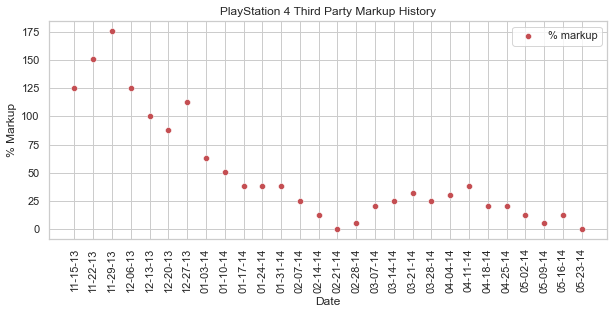

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
sns.scatterplot(x = df_combo["date"].values,
    y = df_combo["percent_markup"].values,
    color = 'r',
    ax = ax)

ax.legend(['% markup'], facecolor='w')
ax.set(xlabel="Date",ylabel="% Markup")
plt.title("PlayStation 4 Third Party Markup History")
plt.xticks(rotation='vertical')
plt.grid(True)

plt.show()

## What if iPad Air 64GB (4th gen) at $599 is scalped at these rates?

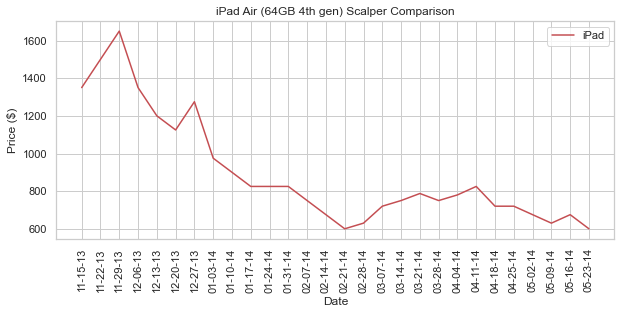

In [15]:
df_combo["ipad"] = ( df_combo["percent_markup"] / 100 + 1 ) * 599

fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = df_combo["date"].values,
    y = df_combo["ipad"].values,
    color = 'r',
    ax = ax)
ax.legend(['iPad'], facecolor='w')
ax.set(xlabel="Date",ylabel="Price ($)")
plt.title("iPad Air (64GB 4th gen) Scalper Comparison")
plt.xticks(rotation='vertical')
plt.grid(True)


plt.show()

## What if MacBook Pro 13" ($1299) was scalped at these rates?

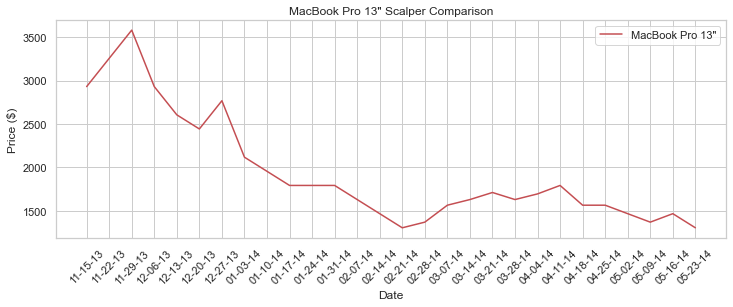

In [16]:
df_combo["macbook"] = ( df_combo["percent_markup"] / 100 + 1 ) * 1299

fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x = df_combo["date"].values,
    y = df_combo["macbook"].values,
    color = 'r',
    ax = ax)
ax.legend(['MacBook Pro 13"'], facecolor='w')
ax.set(xlabel="Date",ylabel="Price ($)")
plt.title('MacBook Pro 13" Scalper Comparison')
plt.xticks(rotation=45)
plt.grid(True)


plt.show()

## What if this same markup was applied to chapstick (MSRP 1.99) or Dove Body Wash (MSRP 5.89)?

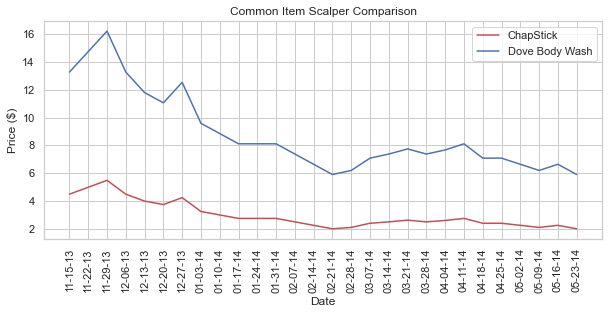

In [17]:
df_combo["chapstick"] = ( df_combo["percent_markup"] / 100 + 1 )* 1.99
df_combo["bodywash"] = ( df_combo["percent_markup"] / 100 + 1 ) * 5.89

fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = df_combo["date"].values,
    y = df_combo["chapstick"].values,
    color = 'r',
    ax = ax)
sns.lineplot(x = df_combo["date"].values,
    y = df_combo["bodywash"].values,
    color = 'b',
    ax = ax)
ax.legend(['ChapStick','Dove Body Wash'], facecolor='w')
ax.set(xlabel="Date",ylabel="Price ($)")
plt.title("Common Item Scalper Comparison")
plt.xticks(rotation='vertical')
plt.grid(True)

plt.show()

## Fitting the markup data with a non-linear regression

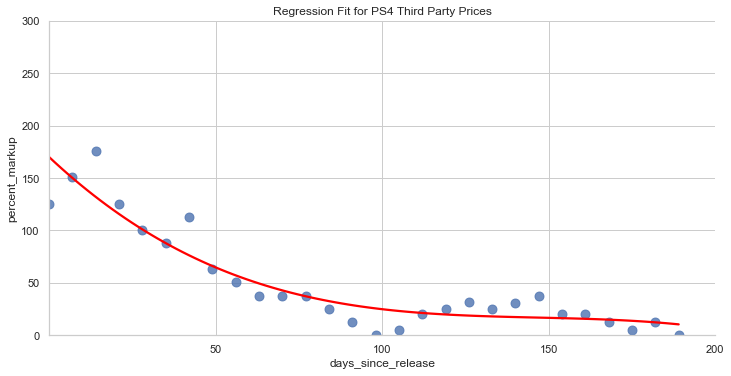

In [18]:
ps5regressionplot = sns.lmplot(x="days_since_release", y="percent_markup", data=df_combo, order=3,  ci=None, line_kws={'color': 'red'}, scatter_kws={"s": 80}, height=5, aspect=2)

ps5regressionplot.set(
    title="Regression Fit for PS4 Third Party Prices",
    xlim=(0,200),
    xticks=[50,100,150,200],
    ylim=(0,300),
    yticks=[0,50,100,150,200,250,300])

## Regression Performed with SKlearn: Support Vector Regression (SVR)

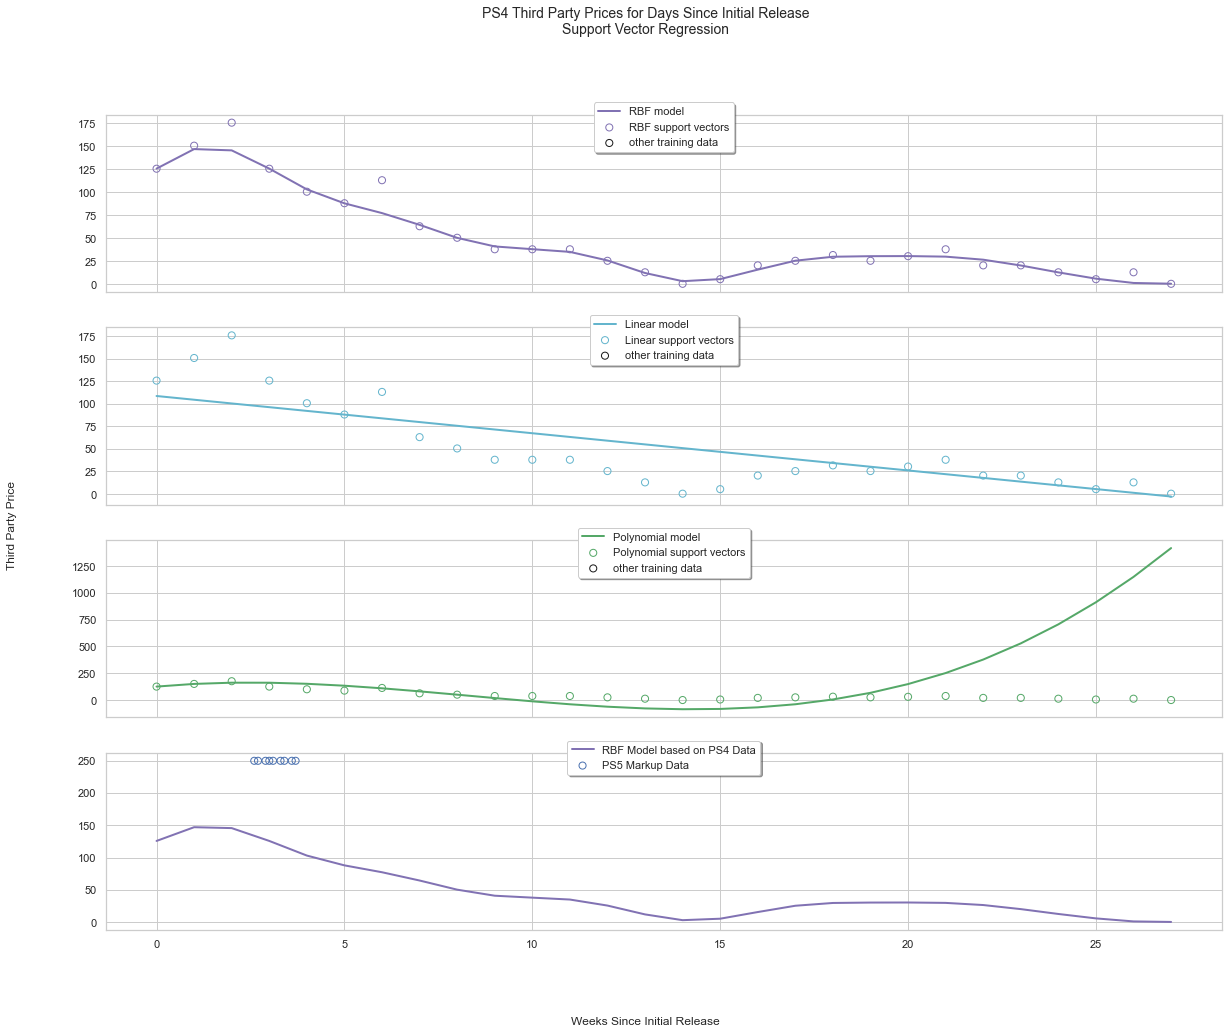

In [19]:
#PS4 historical data to create regression lines
df_combo["weeks_since_release"] = df_combo.index.values
#had to not multiply by 7 to reduce processing needed
X=df_combo["weeks_since_release"].values.reshape(-1,1)
y=df_combo["percent_markup"].values

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

lw=2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,15), sharex=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw, label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none", edgecolor=model_color[ix], s=50, label='{} support vectors'.format(kernel_label[ix]))    
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)], y[np.setdiff1d(np.arange(len(X)), svr.support_)], facecolor="none", edgecolor="k", s=50, label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)    

#plot best fit line with PS5 actual data
# sold data range 11/30-12/8.... ps5 release date 11/12
ps5_weeks_since_sale = [2.6,2.7,2.9,3.0,3.1,3.3,3.4,3.6,3.7]

ps5_sold_avg = [1000,1000,1000,1000,1000,1000,1000,1000,1000]

ps5_msrp = 399
ps5_percent_markup = [x / ps5_msrp * 100 - 1 for x in ps5_sold_avg]

axes[3].plot(X, svrs[0].fit(X, y).predict(X), color='m', lw=lw, label='RBF Model based on PS4 Data')
axes[3].scatter(ps5_weeks_since_sale, ps5_percent_markup, facecolor="none", edgecolor='b', s=50, label='PS5 Markup Data') 
axes[3].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)    

fig.text(0.5, 0.04, 'Weeks Since Initial Release', ha='center', va='center')
fig.text(0.06, 0.5, 'Third Party Price', ha='center', va='center', rotation='vertical')
fig.suptitle("PS4 Third Party Prices for Days Since Initial Release\nSupport Vector Regression", fontsize=14)
plt.show()


## Conclusions